<a href="https://colab.research.google.com/github/dre1597/Alura-imersao-3/blob/main/Alura_Aula_03_Imers%C3%A3o_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
dados = pd.read_csv(url_dados, compression = 'zip')

#Aula 03

Documentação do crosstab: https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html

In [ ]:
pd.crosstab(dados['dose'], dados['tempo'])

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'])

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'],  normalize='index')

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='mean')

Para esse tipo de gráfico é mais ideal um scatterplot

In [ ]:
sns.scatterplot(x='g-0', y='g-3', data=dados)

In [ ]:
dados[['g-0', 'g-3']]

In [ ]:
sns.scatterplot(x='g-0', y='g-8', data=dados)

In [ ]:
sns.lmplot(x='g-0', y='g-8', data=dados, line_kws={'color': 'red'})

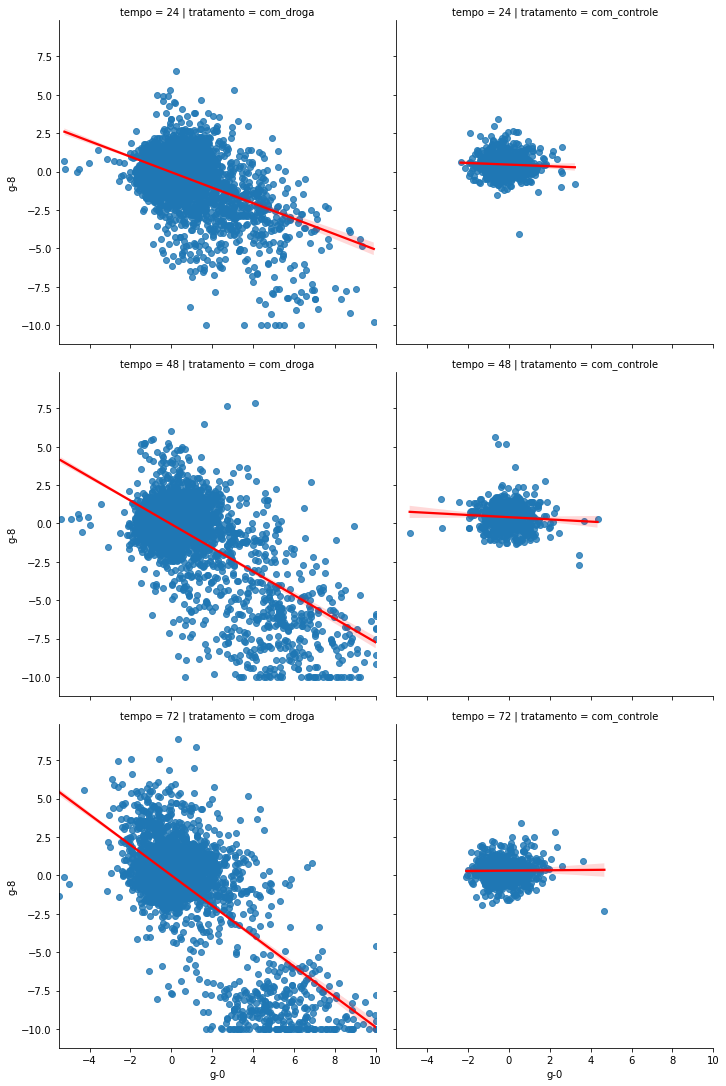

In [2]:
sns.lmplot(x='g-0', y='g-8', data=dados, line_kws={'color': 'red'}, col='tratamento', row="tempo")

Uma outra forma de vermos tendências nos nossos dados é utilizando o método corr()

In [ ]:
dados.loc[ : , 'g-0':'g-771'].corr()

In [ ]:
corr = dados.loc[ : , 'g-0':'g-50'].corr()

In [ ]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
corr = dados.loc[ : , 'c-0':'c-50'].corr()

In [ ]:

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#Desafios Aula 03

## Desafio 01: Criar tabelas de frequência com pandas.groupby()

In [ ]:
dados.groupby(['dose', 'tempo']).size()

tempo,24,48,72
dose,,,
D1,3886,4354,3907
D2,3886,3896,3885


In [ ]:
dados.groupby(['dose', 'tempo']).size().unstack(1)

tempo,24,48,72
dose,,,
D1,3886,4354,3907
D2,3886,3896,3885


## Desafio 02: Normalizar o crosstab pela coluna

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], normalize='columns')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

## Desafio 03: Explorar outros agregadores

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='max')

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='min')

tratamento  com_controle  com_droga
dose tempo                         
D1   24           -2.370     -5.183
     48           -3.276     -5.420
     72           -2.086     -5.261
D2   24           -2.135     -5.233
     48           -4.859     -4.567
     72           -1.909     -5.513

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='std')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.751395   1.461954
     48         0.853396   1.693903
     72         0.769294   1.458600
D2   24         0.836626   1.044999
     48         0.836845   1.315476
     72         0.878041   1.451532

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='count')

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

## Desafio 04: Explorar o Melt

Documentação do melt: https://pandas.pydata.org/docs/reference/api/pandas.melt.html

In [ ]:
dados.melt

In [ ]:
dados.melt(id_vars='tratamento')

In [ ]:
dados.melt(id_vars='tratamento', value_vars='tempo')

In [ ]:
dados.melt(id_vars='tratamento', value_vars='tempo', var_name='tempo')

In [ ]:
dados.melt(id_vars='tratamento', value_vars='tempo', var_name='tempo', value_name='em hrs')

##Desafio 05: Calcular e analisar a correlação entre os gn e cn. Refletir sobre os efeitos biológicos

Verificando essa correlação nos dados do grupo de controle.


In [3]:
dados_controle = dados[dados['droga'] == 'cacb2b860']
dados_controle['tratamento'].unique()

array(['com_controle'], dtype=object)

In [4]:
g_filtrado = dados[dados['droga'] == 'cacb2b860'].loc[:,'g-0':'g-30']
c_filtrado = dados[dados['droga'] == 'cacb2b860'].loc[:,'c-0':'c-30']
concatenado = pd.concat([g_filtrado, c_filtrado], axis = 1)
concatenado

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,c-0,c-1,c-2,c-3,c-4,c-5,c-6,c-7,c-8,c-9,c-10,c-11,c-12,c-13,c-14,c-15,c-16,c-17,c-18,c-19,c-20,c-21,c-22,c-23,c-24,c-25,c-26,c-27,c-28,c-29,c-30
25,-0.6696,-0.2718,-1.2230,-0.6226,-0.7220,0.1588,0.7785,0.7062,-0.7951,1.3770,0.2856,-0.8331,0.3879,1.3290,-0.4746,0.0857,-0.2745,-0.1093,0.2603,0.7386,-0.6665,-1.6520,-0.9262,0.0000,1.6310,-0.2933,0.2043,-2.2070,0.1383,-0.4966,0.6922,0.4665,0.2532,0.7212,-0.4467,0.7621,0.2687,-0.1338,0.6366,0.6220,-0.3014,0.7567,1.2480,0.6420,1.5370,0.8386,0.8053,0.1935,1.3500,0.4042,1.5230,0.0741,0.2019,0.3635,0.3103,0.8123,0.4770,0.4972,0.4685,0.4348,0.5421,0.4056
38,-0.1636,-1.8230,-0.5211,0.3054,-1.1280,0.6041,0.3856,-0.1670,-0.5400,0.2721,-0.2479,0.0761,-0.4054,2.9760,-0.7679,0.6995,0.0752,0.5943,0.4266,0.0000,1.0410,-0.1131,0.6593,-0.6890,0.5115,-0.2512,-0.8775,-1.3810,0.1419,-0.0363,0.2559,0.1431,-0.1254,-0.0740,0.0288,-0.7198,-1.0040,0.3443,-0.6593,0.1020,-0.1742,0.0873,0.0208,0.1540,-0.6229,-0.3923,0.0964,-1.0500,0.9068,-0.0658,-0.1852,0.0576,0.5113,-0.3795,0.1957,-0.3674,0.1904,-0.1540,0.4123,-0.8581,-0.2263,0.7330
40,-1.3200,-1.7340,-0.0741,1.5440,-1.8290,-0.0951,0.3829,-1.8700,-0.0324,2.7670,-0.0438,-0.0147,0.1276,0.2968,-0.0704,-0.3767,2.5790,0.4069,-0.3868,-0.2782,1.8180,-2.9390,-0.1150,-0.8009,-1.4440,0.5412,-0.0804,-0.4444,2.9230,2.8270,-0.3437,0.8107,0.7110,-0.0797,0.1703,1.7100,-0.0436,-0.2968,0.8906,-0.5218,1.2530,0.8287,0.9787,1.1110,-0.2813,0.3524,0.6322,1.4640,0.4940,0.4516,1.0320,0.8206,-0.0691,1.0970,0.2771,0.4753,0.2259,1.0160,0.4358,0.0752,0.9084,0.7651
47,0.4860,0.1430,0.5281,-0.0022,-0.2334,-0.6607,0.6459,-0.0109,1.0120,-0.0864,-0.3817,-1.0600,0.9435,0.6296,0.3864,0.1420,0.9834,0.4189,0.7980,-0.2132,0.7651,-1.2410,0.0747,-1.5750,0.1535,-0.0840,0.6705,-0.7517,-0.2756,-1.0920,-0.8683,-0.6666,0.3619,-0.4816,0.3545,0.0480,-0.1306,0.3623,-1.4190,0.1975,-0.2137,-0.3358,-0.9395,-0.1191,0.5055,-0.2079,0.1760,-0.5248,0.0266,-0.1298,-0.5139,-0.4645,-0.5434,-0.7326,-0.3624,-0.1764,-0.4371,-0.6318,0.5859,0.9494,-0.7306,0.2834
63,0.4471,-0.0839,-0.3864,0.3196,0.2584,-0.3156,-0.1187,1.1610,0.5838,-0.2996,-0.3995,1.0700,0.2969,-0.2785,0.9678,-0.1409,1.0850,-0.0656,-0.6502,0.3527,0.1998,0.0975,0.0563,-0.3578,-0.0657,0.5316,0.6573,-0.5355,1.2380,-0.4994,-0.8140,0.8432,0.4478,-0.8843,-0.6954,0.4762,0.9160,0.1785,0.2807,1.3500,0.1766,-0.1137,1.4910,-0.6229,-0.9833,-0.1895,0.5661,0.6124,-0.1581,0.3927,0.8244,0.5313,0.4941,-0.6869,0.0460,0.4194,0.5550,1.1300,-0.2166,0.6102,0.3593,-0.4806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23729,0.0465,0.6430,-0.2453,0.3521,0.6195,-0.6659,0.8263,0.5933,0.1388,-0.2246,-0.6127,-0.1687,1.5170,0.6243,-0.8399,-0.1881,-0.1583,0.0622,-0.1170,0.7722,0.0063,0.7347,-0.4820,0.0000,0.0938,-0.6062,0.6108,-0.4900,0.1075,0.3029,-0.1369,0.6950,0.2731,0.6061,0.2976,0.3948,0.8336,1.1720,0.0790,0.3028,-0.0120,0.0781,0.2334,0.1682,0.3971,0.6605,-0.6505,-0.1283,-0.4924,0.1668,1.2440,-1.6380,0.5628,0.9434,0.9574,0.0359,1.1500,0.8947,-0.9647,-0.6059,0.4703,-0.1513
23747,-0.6204,-1.3800,-1.1880,-0.6573,-0.8408,-0.2447,1.3490,-0.5155,1.2610,-0.1790,-0.7182,-0.7885,0.3022,2.0140,0.1667,-0.7325,-0.1553,0.8400,-0.1069,-0.7247,1.3430,1.5010,-1.3370,0.7190,-0.0843,0.4841,-0.9104,1.3990,0.7447,-1.2110,0.6562,1.6290,-0.2854,0.2248,-1.4850,0.9749,0.6954,0.9388,0.0511,0.2647,1.0440,0.7449,1.0390,-0.1519,0.6743,1.3460,0.1894,0.7540,0.9674,0.6959,0.2556,1.5190,0.9388,-0.9945,-0.1075,0.9664,0.9317,0.4137,1.3970,-0.5932,0.1369,0.4803
23768,-0.1051,0.4335,0.3648,-0.0525,-0.3632,-0.3228,-2.3190,-0.5294,0.1878,0.5047,1.3820,0.6107,2.4790,0.4347,0.9422,-0.1042,-0.2611,1.5760,-0.0232,-0.2455,0.8058,-2.4180,-0.5838,-0.1626,-0.8609,-0.2021,0.1494,0

In [5]:
concat_corr = concatenado.corr()


In [ ]:
mask = np.triu(np.ones_like(concat_corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(concat_corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5,cbar_kws={"shrink": .5})

Podemos ver que que a coorelação entre as celulas em si é bem mais baixa nesse conjunto de dados(apenas os experimentos do grupo de controle) do que no escolhido anteriormente( as 50 primeiras celulas). Enquanto a coorelação entre  os genes em si é bem mais pontual. Por último a coorelação entre os genes e as celulas ja é quase nula. Imagino que essa seja a ideia do grupo de controle, sendo algo mais neutro.

##Desafio 06: Estudar o código que plota a matriz de correlação (heatmap)

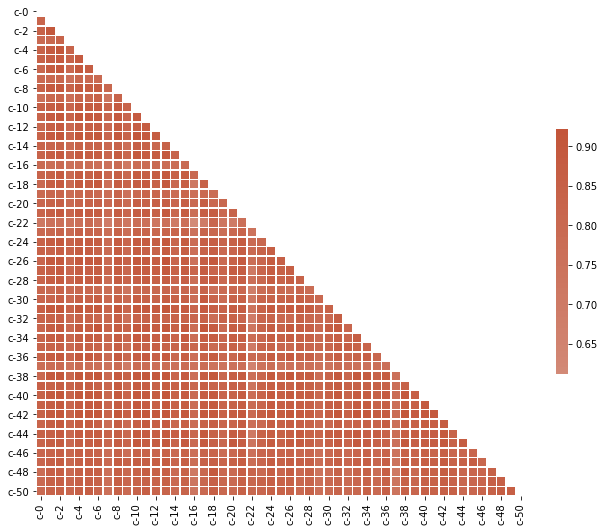

In [ ]:
corr = dados.loc[ : , 'c-0':'c-50'].corr()

# np.triu = valores de cima do triangulo
# Os valores onde a mascara vale não sao mostrados, valores nulos já fazem parte da mascara automaticamente.

mask = np.triu(np.ones_like(corr, dtype=bool))

# Seta a figura
f, ax = plt.subplots(figsize=(11, 9))

# Seta o mapa de cres
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# mapa de calor
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# corr -> correlação 
# mask ->  mascara
# center -> onde fica o centro do mapa de calor
# square -> o formato dos pedaços do mapa
# linewidth -> o tamanho das linhas
# cbar_kws -> valores mandados pra outra camada do grafico feita pelo figure do matplotlib, no caso shrink seria pro tamanho do mapa de cores

##Desafio 07: Resumo do que você aprendeu com os dados

Pra essa aula não explorei muito os dados, apenas vi algumas coorelações, mas como sempre coorelações não significam causalidade.

Mas aprendi sobre alguns agregadores de dados, tabelas de frequências e uma forma automatizada de gerar coorelações em vez de ficar olhando dado a dado da tabela utilizando um mapa de calor.